## Results of Host Prediction
### Dataset: HEV sequences: ORF1, 2, 3, 4
### Sequences aligned using MAFFT

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**:

**Classification**: Multi-class

**\# classes**: 3 (Human, Boar, Others)

**\# ORF1 (n=954)**
***train=763, val=95, test=96***

**\# ORF2 (n=935)**
***train=748, val=93, test=94***

**\# ORF3 (n=933)**
***train=746, val=93, test=94***

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python310.zip',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/lib-dynload',
 '',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/site-packages',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/../../..',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import utils, evaluation_utils, visualization_utils

In [6]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"
human_col = "Human"
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.autolayout'] = True


def plot_auprc(auprc_map, metadata_map, model_name):
    plt.clf()
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    _, ax = plt.subplots(1, 3, figsize=(20, 8))
    
    i = 0
    for key, auprc_df in auprc_map.items():
        sns.boxplot(data=auprc_df, x="class", y="auprc", ax=ax[i])
        ax[i].set_ylim(0, 1)
        ax[i].set_xticklabels([metadata_map[key][t.get_text()] for t in ax[i].get_xticklabels()])
        ax[i].set_title(f"Model = {key} - {model_name}", fontsize=18)
        ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=16)
        ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=16)
        i += 1
        plt.tight_layout()
    
    plt.show()
        
        
def plot_pr_cuvres(pr_curves_map, metadata_map, model_name):
    plt.clf()
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16

    _, ax = plt.subplots(1, 3, figsize=(20, 8))
    
    i = 0
    for key, pr_curves_df in pr_curves_map.items():
        sns.lineplot(data=pr_curves_df, x="recall", y="precision", hue="class", ax=ax[i])
        ax[i].set_ylim(0, 1)
        ax[i].set_title(f"Model = {key} - {model_name}",  fontsize=18)
        ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=16)
        ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=16)
        i += 1
    
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 16})
    plt.tight_layout()
    plt.show()
    

def auprc_analysis(filepaths, model_name):
    auprc_map = {}
    pr_curves_map = {}
    metadata_map = {}
    
    for key, path in filepaths.items():
        df = pd.read_csv(path, index_col=0)
        print(f"Read output size for {key} = {df.shape}")
        cols = df.columns
        non_human_cols = list(set(cols) - set([itr_col, experiment_col, y_true_col, human_col]))
        print(f"NonHuman cols = {non_human_cols}")
        itrs = df[itr_col].unique()
    
        auprc = []
        pr_curves = []
        for itr in itrs:
            df_itr = df[df[itr_col] == itr]
            pr_curves_df, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=non_human_cols + [human_col], y_true_col=y_true_col)
            pr_curves_df[itr_col] = itr
            auprcs_df[itr_col] = itr
            auprc.append(auprcs_df)
            pr_curves.append(pr_curves_df)
        
        auprc_df = pd.concat(auprc, ignore_index=True)
        pr_curves_df = pd.concat(pr_curves, ignore_index=True)
    
        auprc_map[key] = auprc_df
        pr_curves_map[key] = pr_curves_df
        
        metadata_map[key] = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    
    plot_auprc(auprc_map, metadata_map, model_name)
    plot_pr_cuvres(pr_curves_map, metadata_map, model_name)
    

### FNN

Read output size for orf1 = (480, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf2 = (470, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf3 = (470, 5)
NonHuman cols = ['Others', 'Boar']


<Figure size 640x480 with 0 Axes>

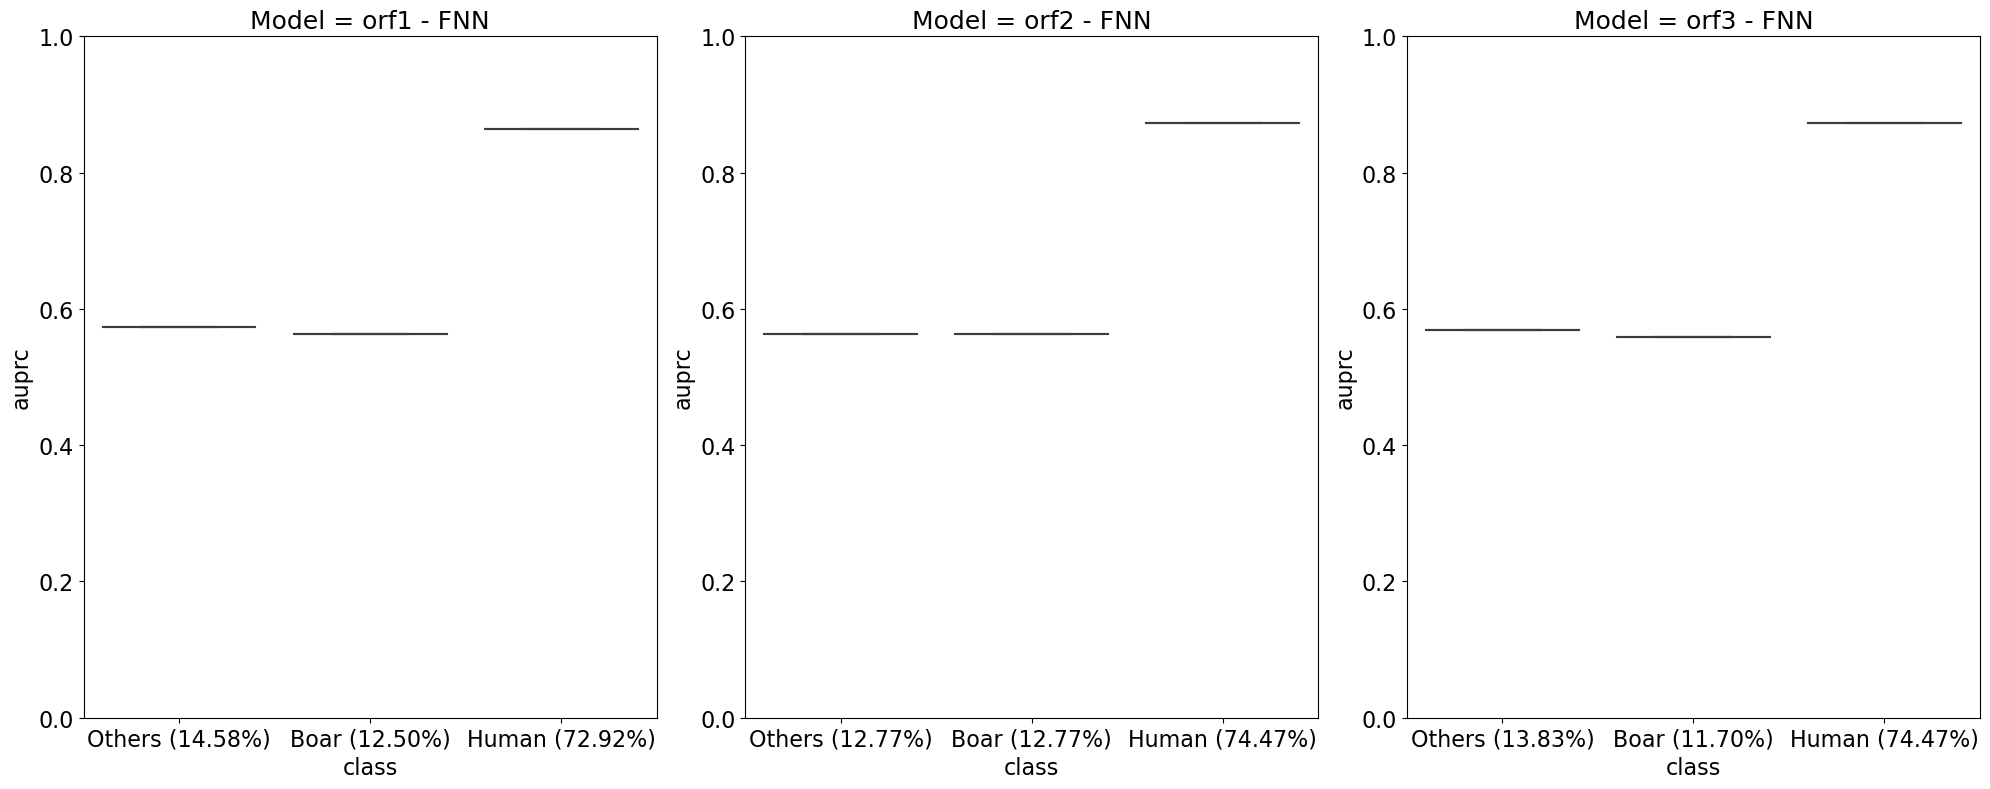

<Figure size 640x480 with 0 Axes>

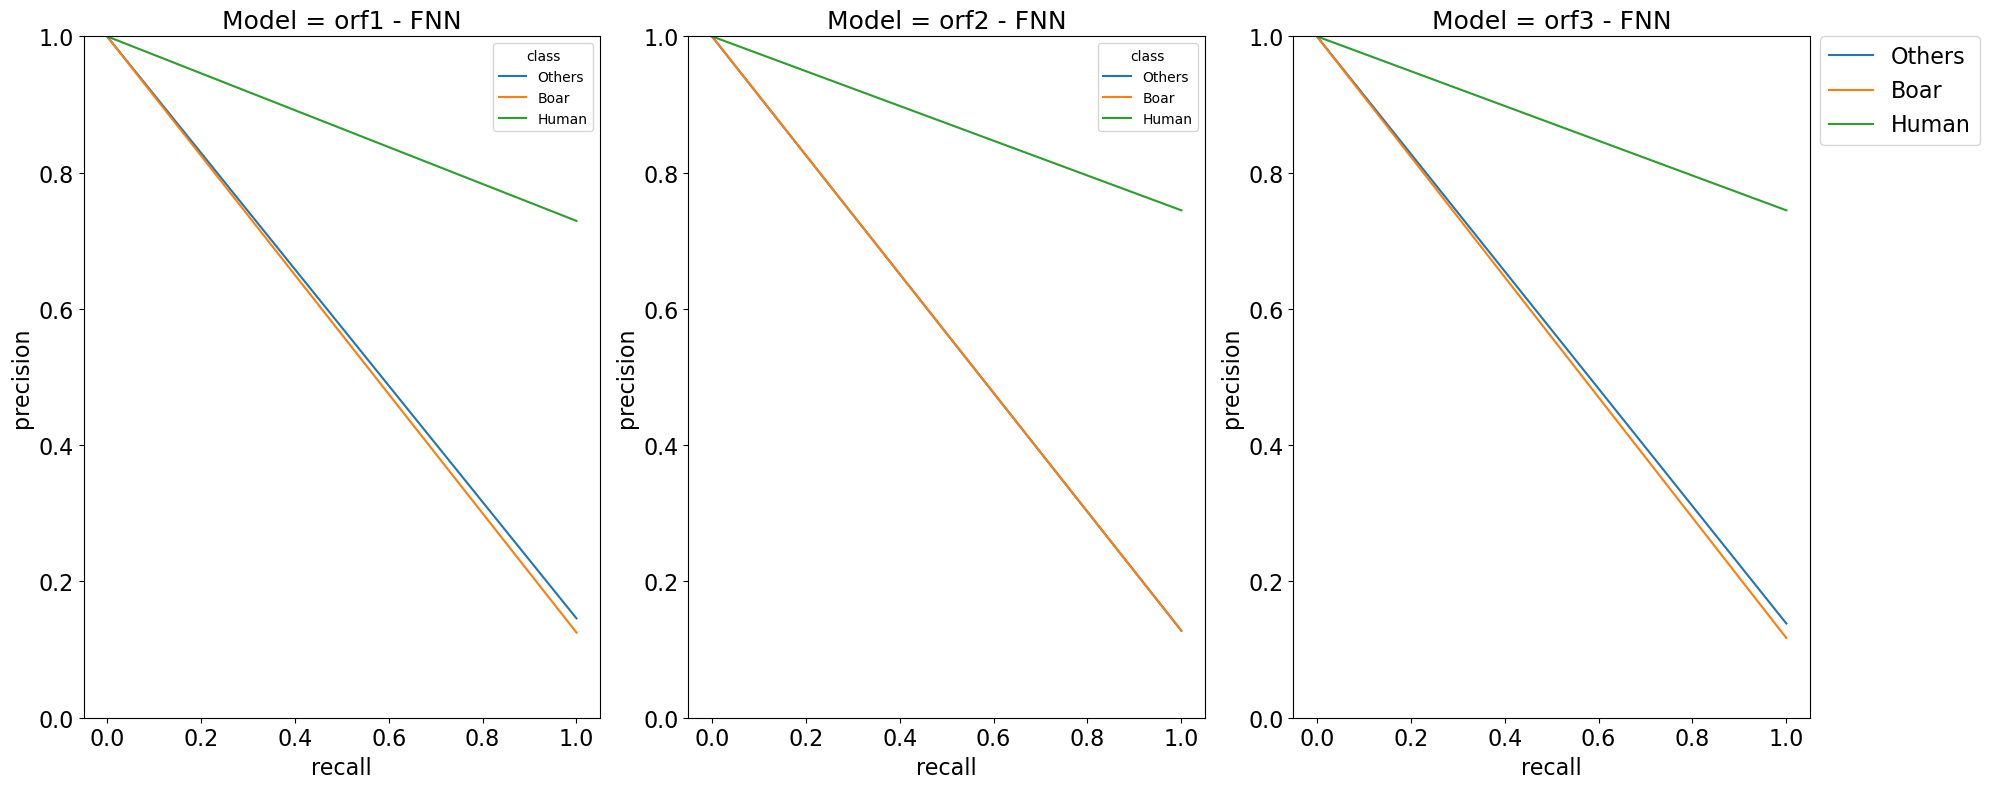

In [9]:
fnn_filepaths = {
    "orf1": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf1/emb_sincos-d_1024-loss_focalce_fnn-l_10-lr1e-3-orf1_output.csv",
    "orf2": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf2/emb_sincos-d_1024-loss_focalce_fnn-l_10-lr1e-3-orf2_output.csv",
    "orf3": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf3/emb_sincos-d_1024-loss_focalce_fnn-l_10-lr1e-3-orf3_output.csv"
}
auprc_analysis(fnn_filepaths, "FNN")

### CNN

Read output size for orf1 = (480, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf2 = (470, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf3 = (470, 5)
NonHuman cols = ['Others', 'Boar']


<Figure size 640x480 with 0 Axes>

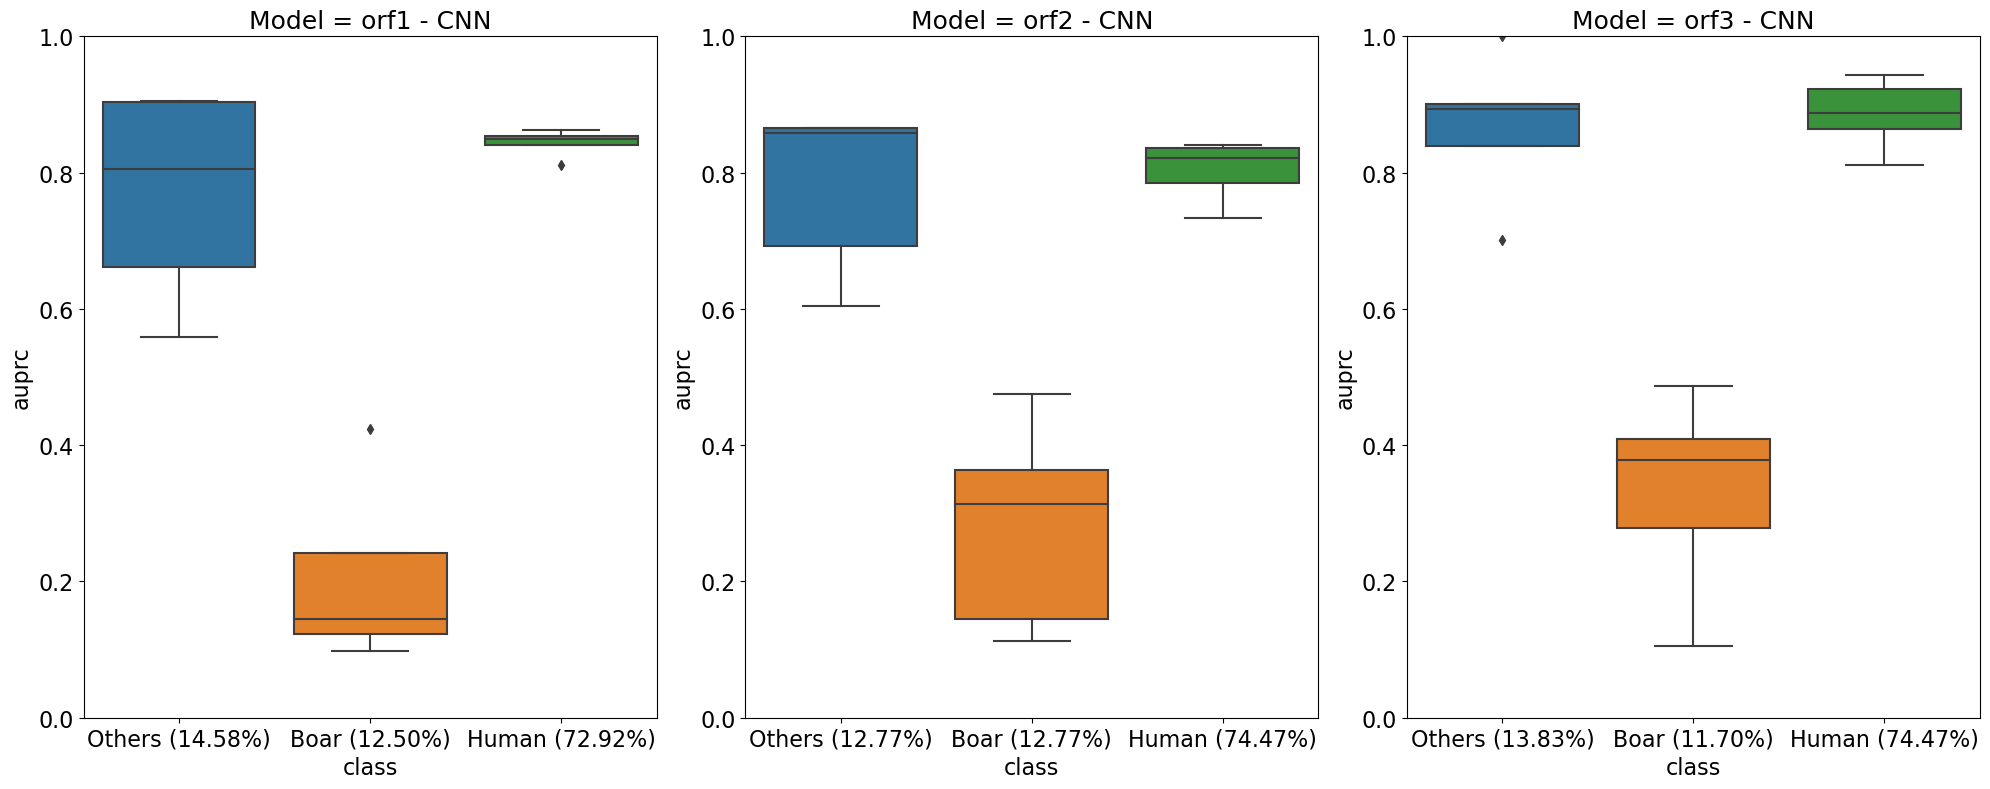

<Figure size 640x480 with 0 Axes>

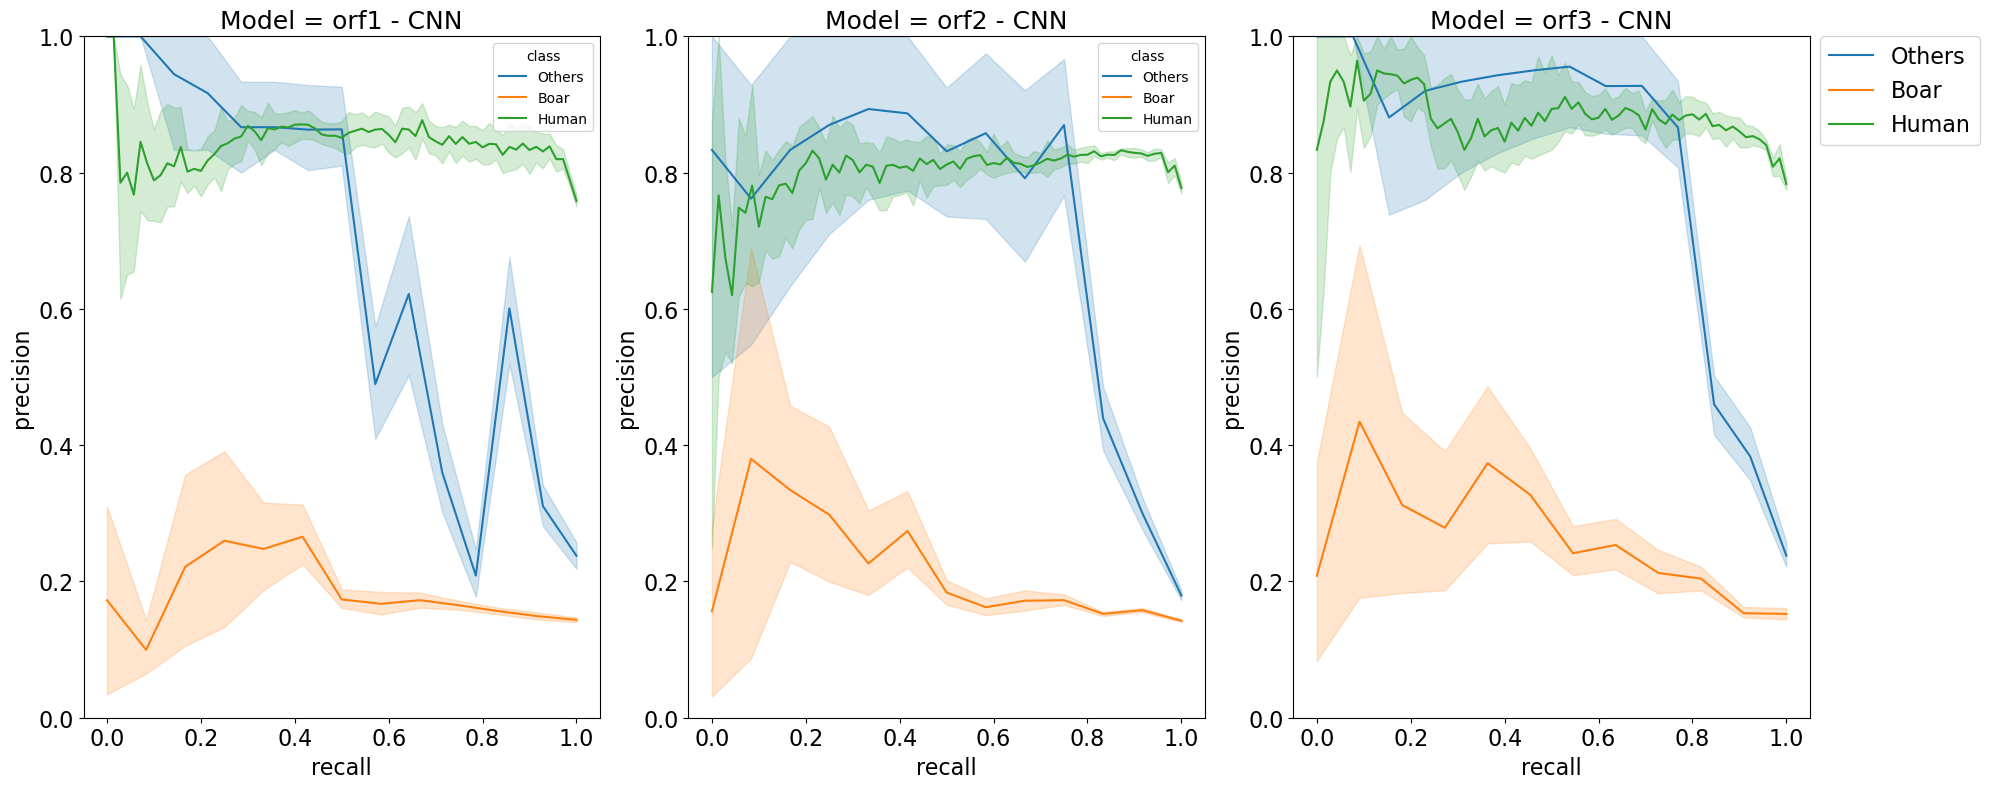

In [10]:
cnn_filepaths = {
    "orf1": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf1/emb_sincos-d_1024-loss_focalce_cnn-l_4-lr1e-3-orf1_output.csv",
    "orf2": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf2/emb_sincos-d_1024-loss_focalce_cnn-l_4-lr1e-3-orf2_output.csv",
    "orf3": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf3/emb_sincos-d_1024-loss_focalce_cnn-l_4-lr1e-3-orf3_output.csv"
}
auprc_analysis(cnn_filepaths, "CNN")

### RNN

Read output size for orf2 = (470, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf3 = (470, 5)
NonHuman cols = ['Others', 'Boar']


<Figure size 640x480 with 0 Axes>

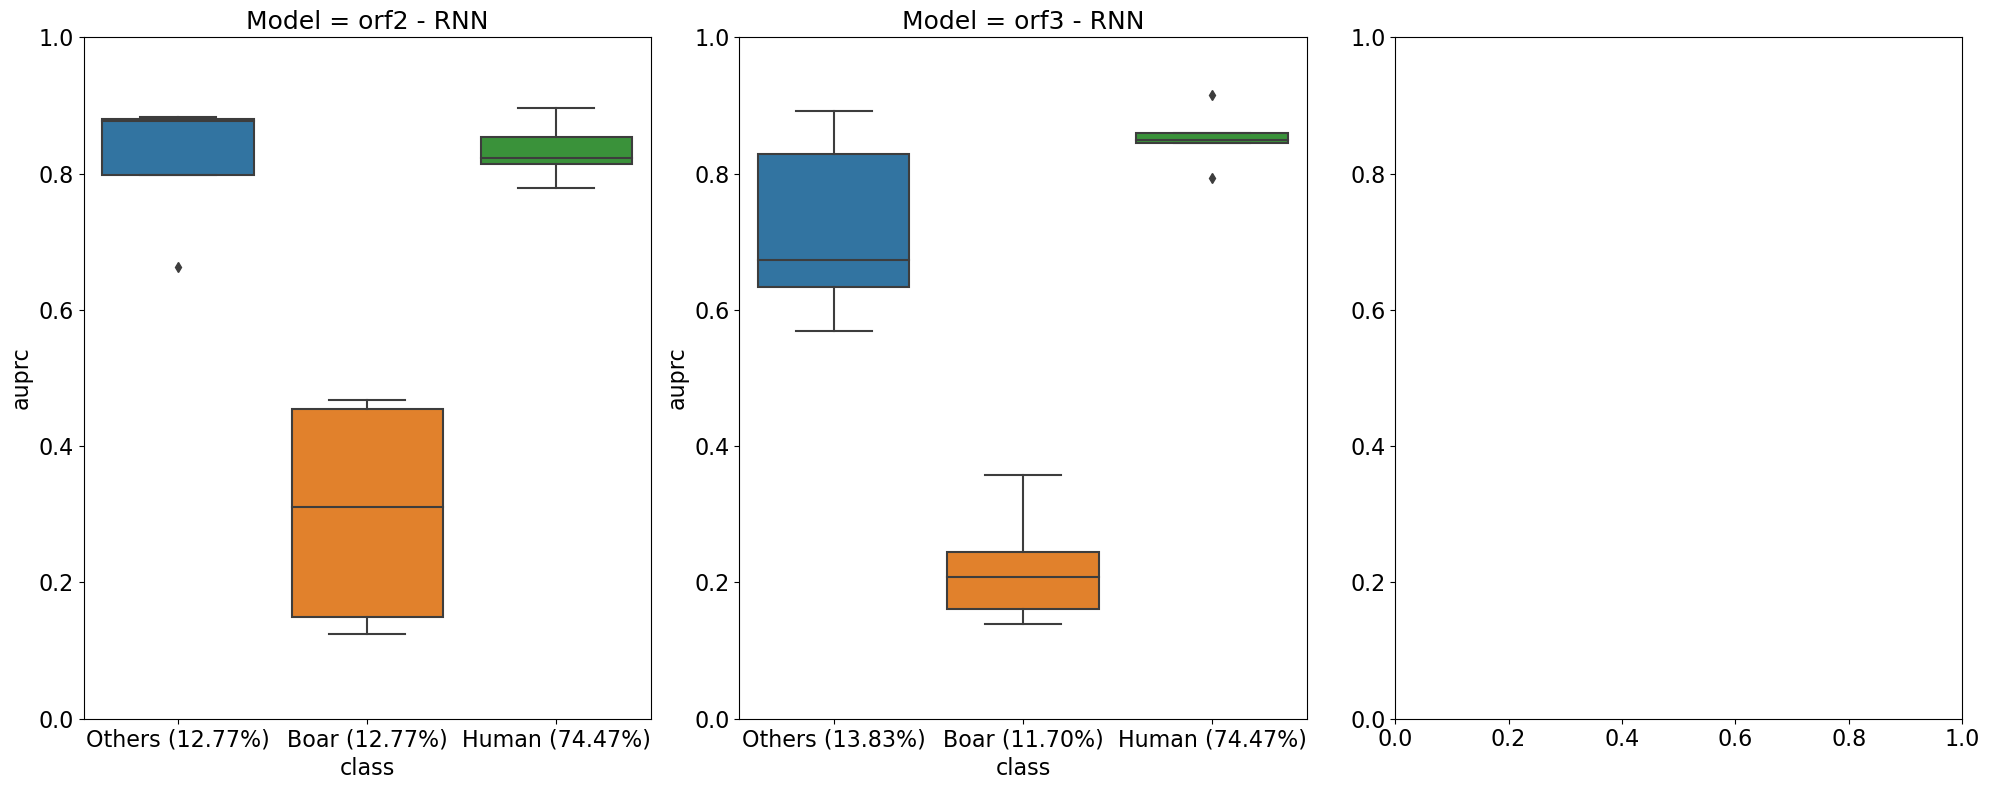

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

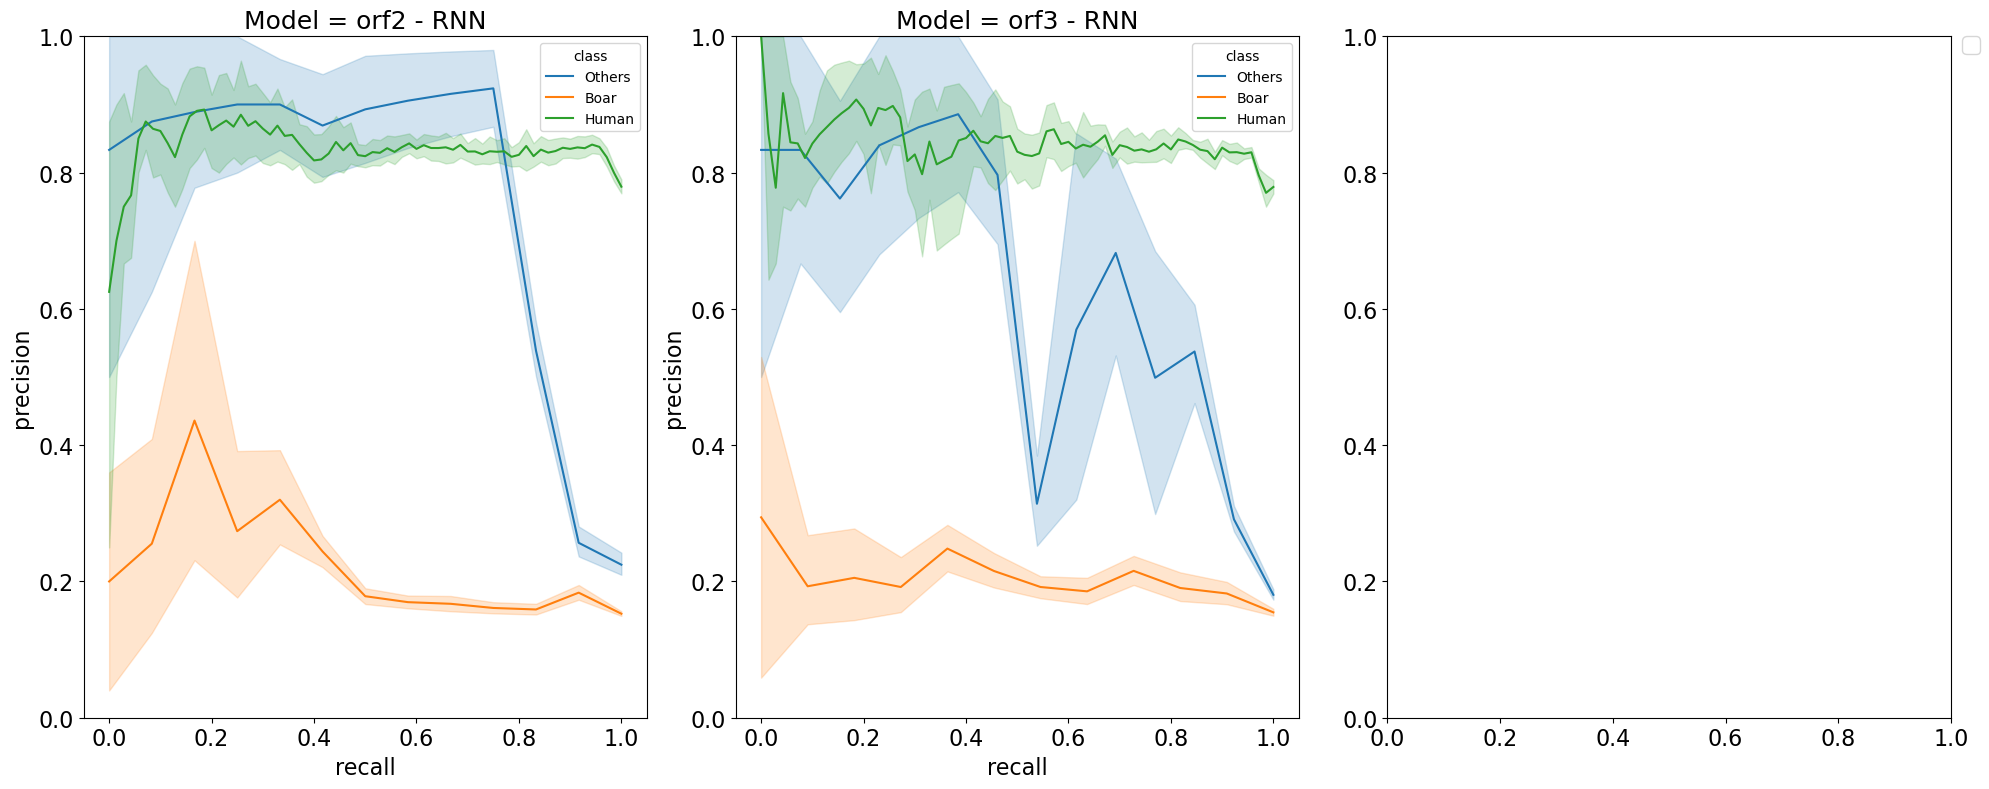

In [13]:
rnn_filepaths = {
    # "orf1": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf1/emb_sincos-d_1024-loss_focalce_rnn-l_6-lr1e-5-orf1_output.csv",
    "orf2": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf2/emb_sincos-d_1024-loss_focalce_rnn-l_6-lr1e-5-orf2_output.csv",
    "orf3": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf3/emb_sincos-d_1024-loss_focalce_rnn-l_6-lr1e-5-orf3_output.csv"
}
auprc_analysis(rnn_filepaths, "RNN")

### LSTM

Read output size for orf1 = (480, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf2 = (470, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf3 = (470, 5)
NonHuman cols = ['Others', 'Boar']


<Figure size 640x480 with 0 Axes>

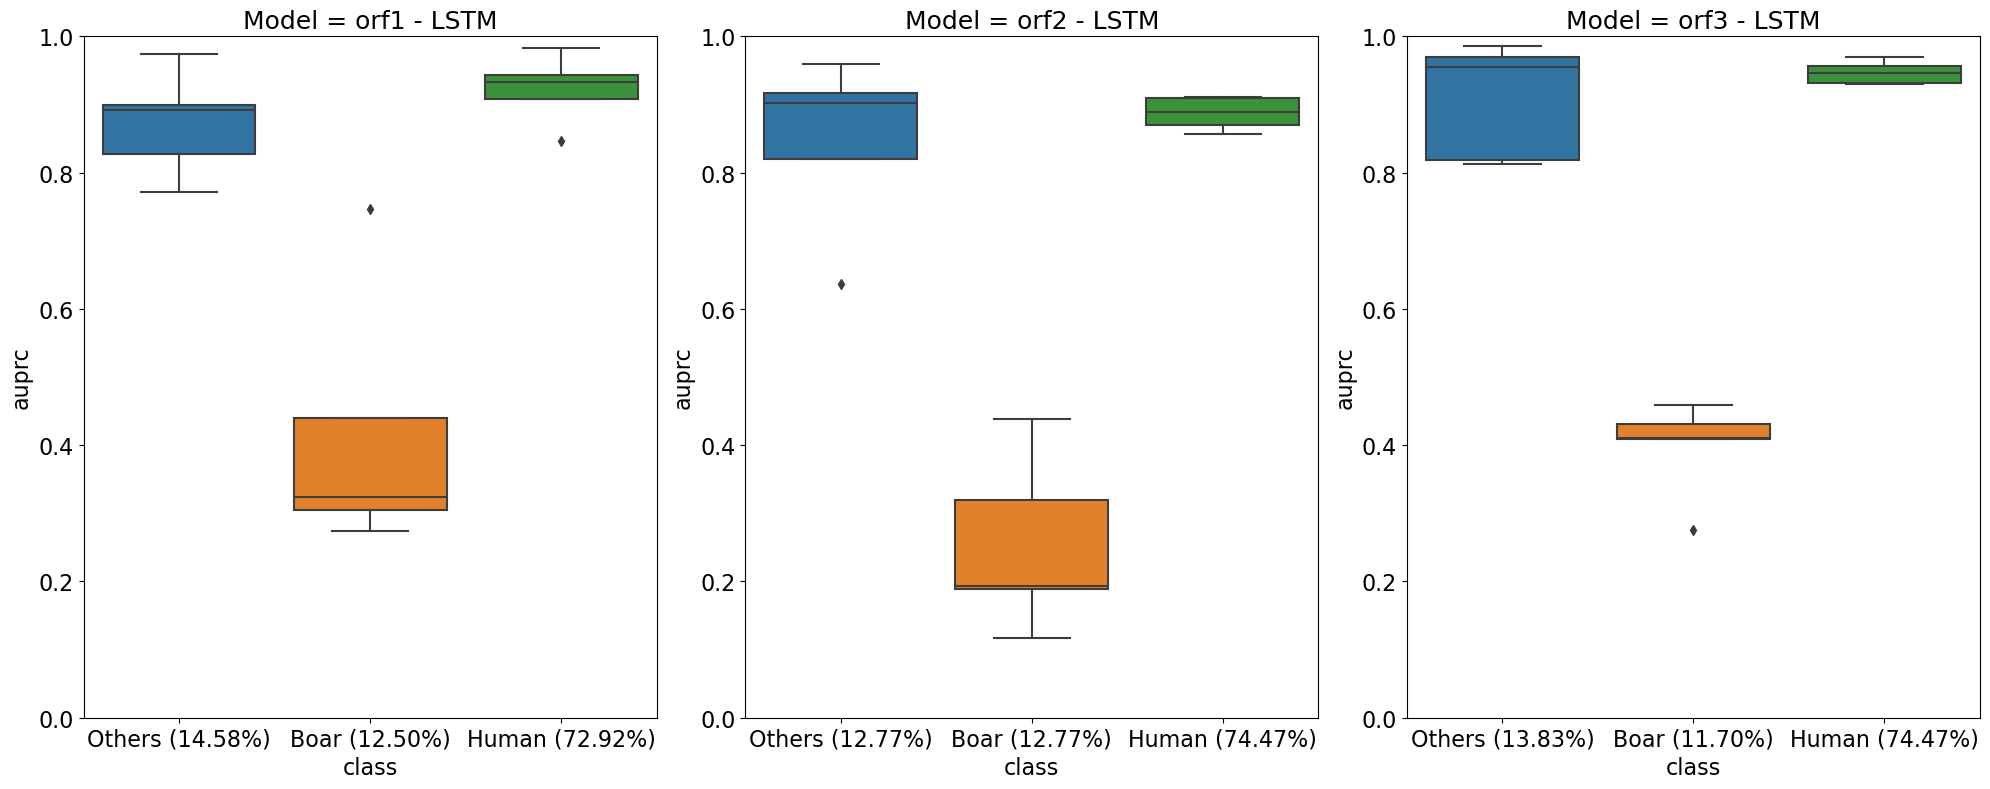

<Figure size 640x480 with 0 Axes>

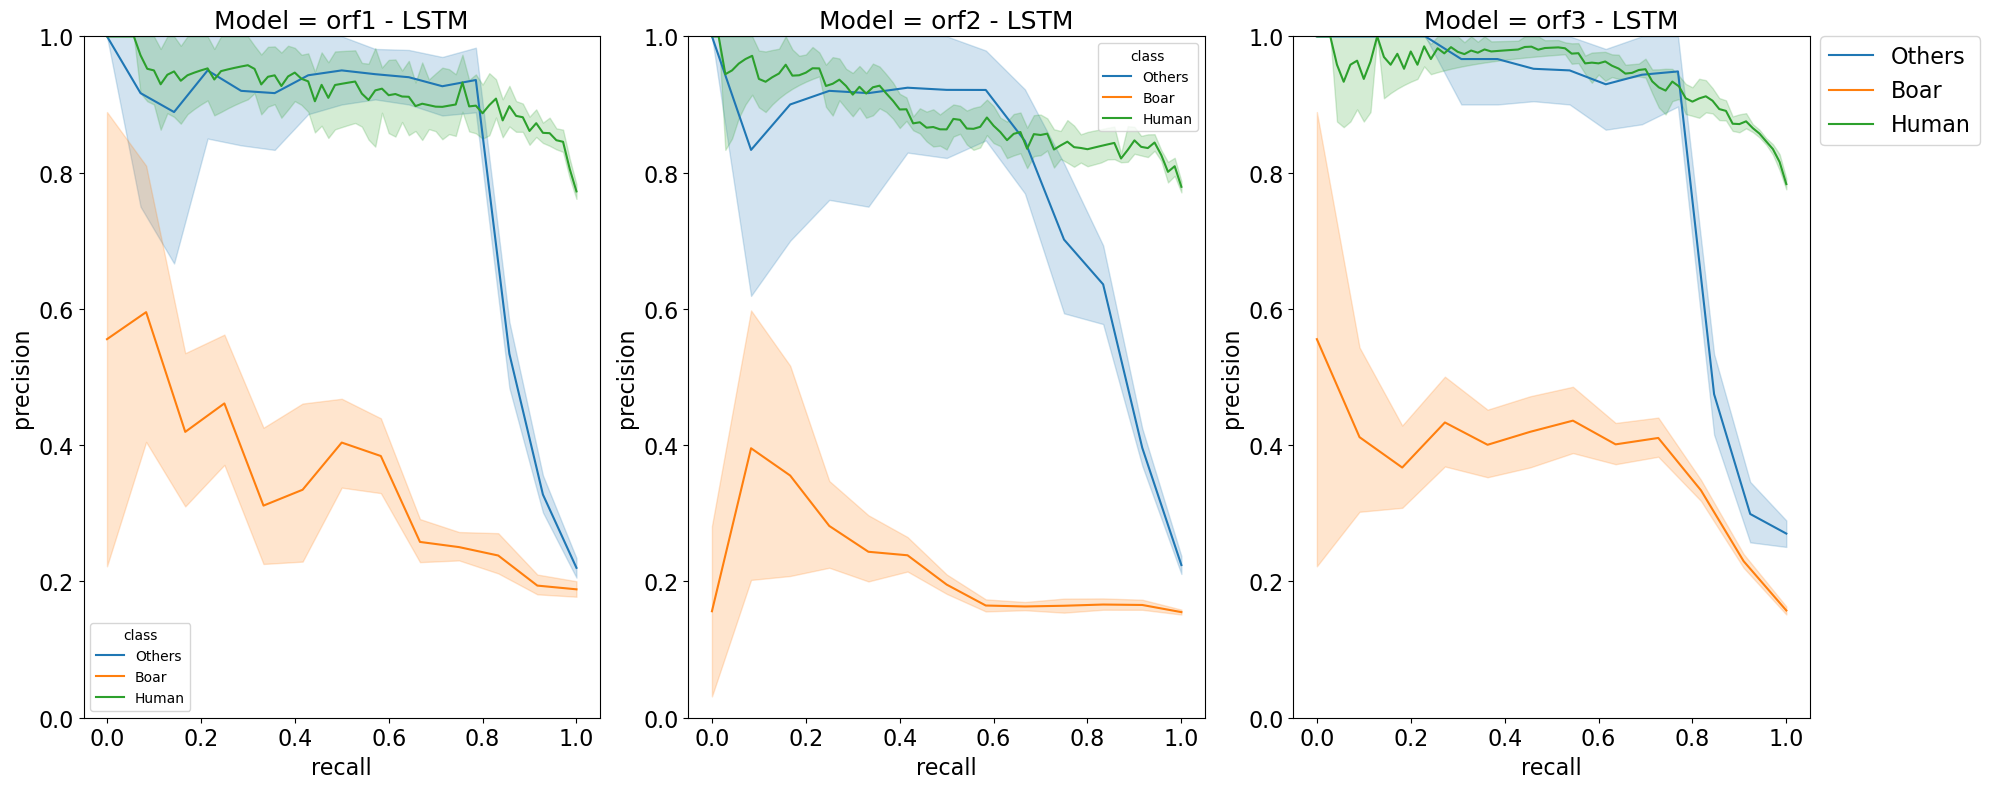

In [14]:
lstm_filepaths = {
    "orf1": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf1/emb_sincos-d_1024-loss_focalce_lstm-l_2-lr1e-3-orf1_output.csv",
    "orf2": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf2/emb_sincos-d_1024-loss_focalce_lstm-l_2-lr1e-3-orf2_output.csv",
    "orf3": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf3/emb_sincos-d_1024-loss_focalce_lstm-l_2-lr1e-3-orf3_output.csv"
}
auprc_analysis(lstm_filepaths, "LSTM")

### Transformer - Custom

Read output size for orf1 = (480, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf2 = (470, 5)
NonHuman cols = ['Others', 'Boar']
Read output size for orf3 = (470, 5)
NonHuman cols = ['Others', 'Boar']


<Figure size 640x480 with 0 Axes>

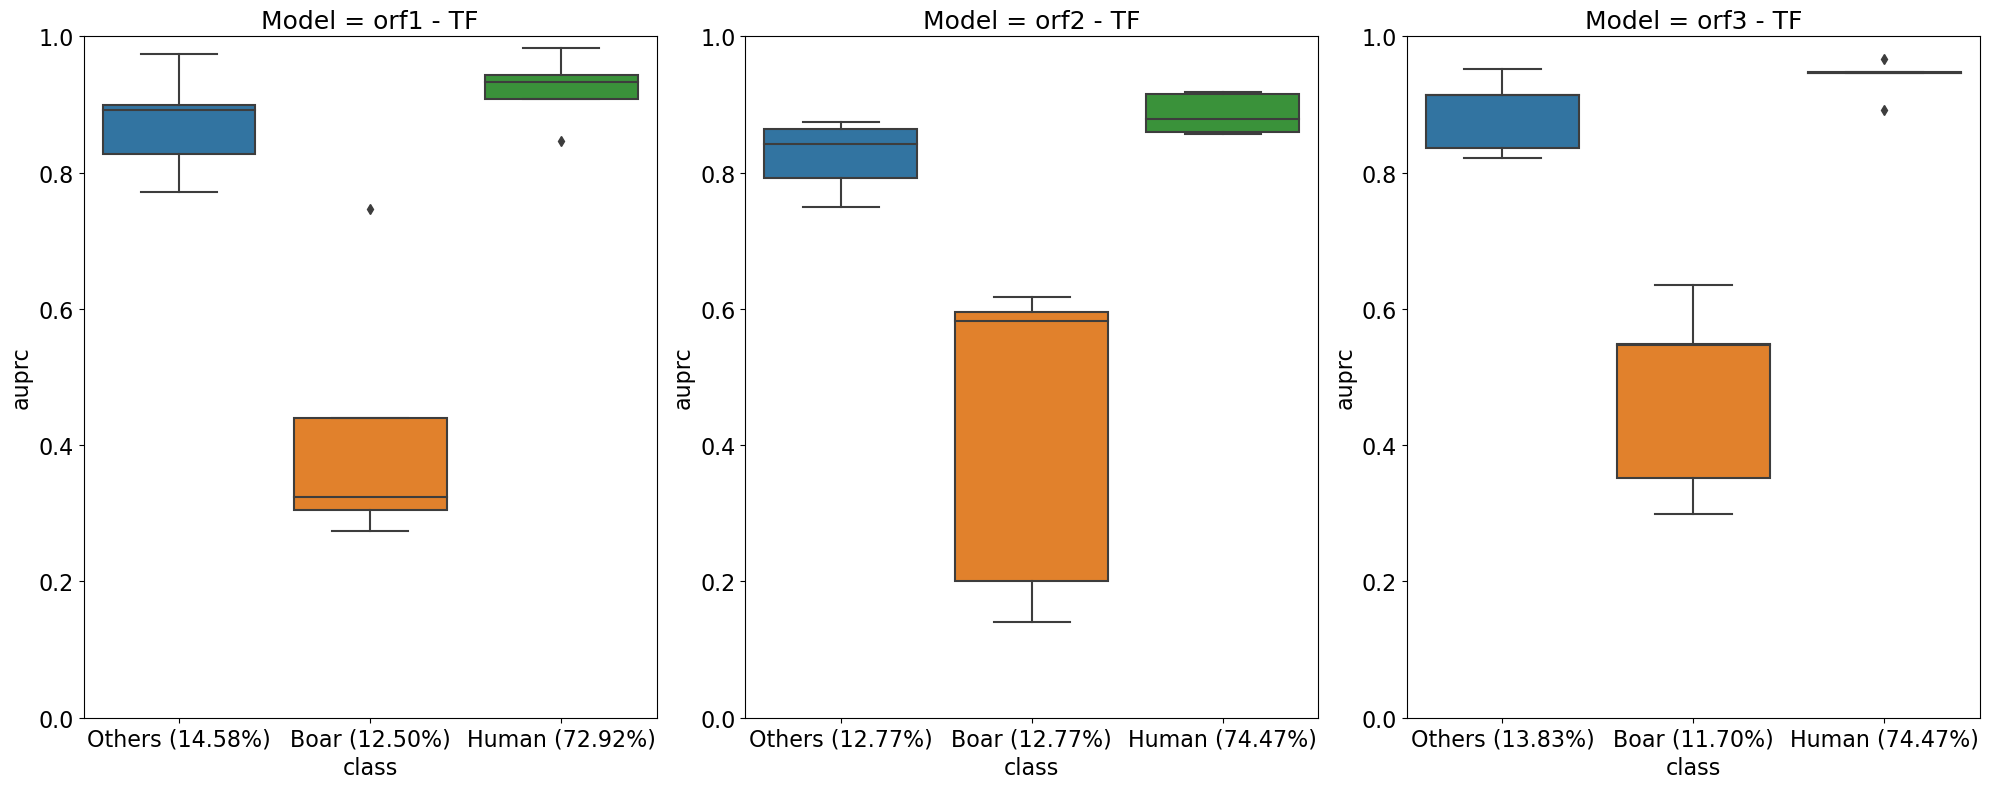

<Figure size 640x480 with 0 Axes>

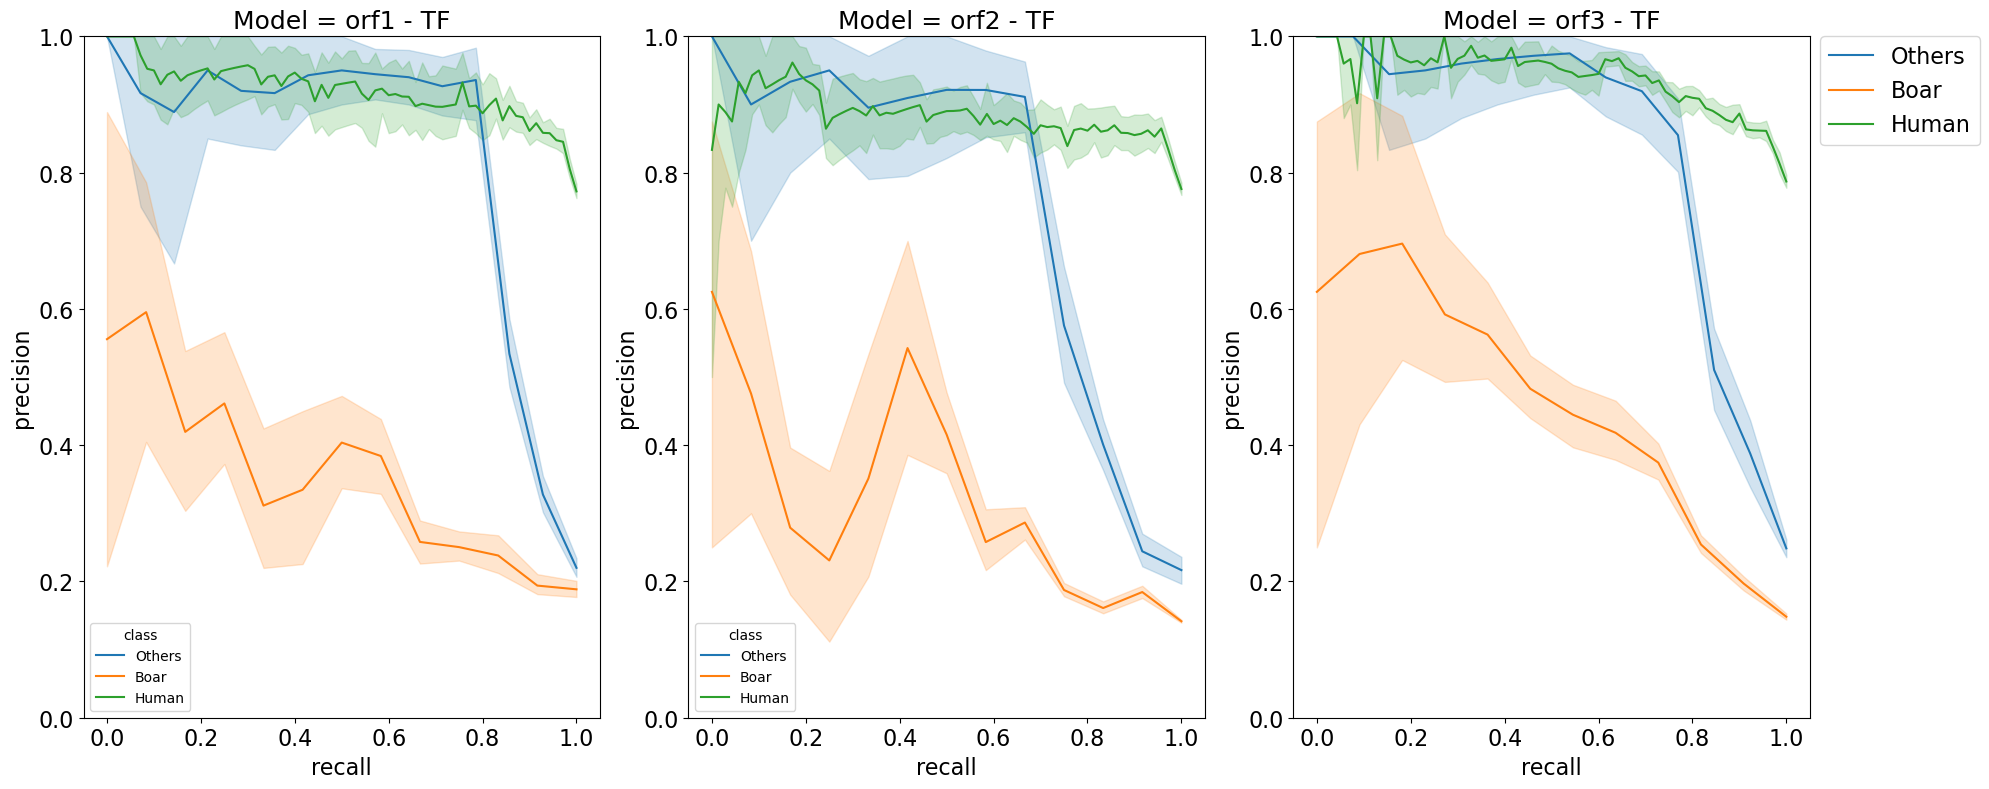

In [15]:
tf_filepaths = {
    "orf1": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf1/emb_sincos-d_1024-loss_focalce_lstm-l_2-lr1e-3-orf1_output.csv",
    "orf2": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf2/emb_sincos-d_1024-loss_focalce_transformer-l_6-h_8-lr1e-4-orf2_output.csv",
    "orf3": "~/dev/git/zoonosis/output/raw/hev/20231012/host_multi_e50/orf3/emb_sincos-d_1024-loss_focalce_transformer-l_6-h_8-lr1e-4-orf3_output.csv"
}
auprc_analysis(tf_filepaths, "TF")